In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Correlation and Covariance

**Covariance** describes how much two variables vary together. *Covariance is short for correlated variances.*      

In other words, **variance** is a measure for how a population vary amongst themselves, and **covariance** is a measure for how much two variables change in relation to each other. 

For example, 
* As height increases weight also generally increases. These variables are correlated. They are positively correlated because as one variable gets larger so does the other.        
* As the outdoor temperature decreases home heating bills increase. These are inversely correlated or negatively correlated because as one variable gets larger the other variable lowers.      
* The price of tea and the number of tail wags my dog makes have no relation to each other, and we say they are uncorrelated or independent- each can change independent of the other.             

**Correlation allows prediction**. If you are significantly taller than me I can predict that you also weigh more than me. As winter comes I predict that I will be spending more to heat my house. If my dog wags his tail more I don't conclude that tea prices will be changing.

For example, here is a plot of height and weight of students on the school's track team. If a student is 68 inches tall I can predict they weigh roughly 160 pounds. Since the correlation is not perfect neither is my prediction.

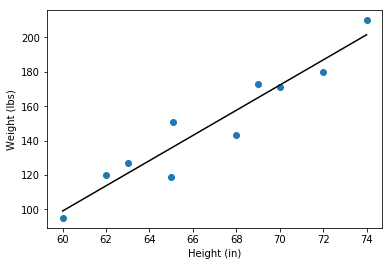

In [2]:
from kf_book.gaussian_internal import plot_correlated_data

height = [60, 62, 63, 65, 65.1, 68, 69, 70, 72, 74]
weight = [95, 120, 127, 119, 151, 143, 173, 171, 180, 210]
plot_correlated_data(height, weight, 'Height (in)', 'Weight (lbs)', False)

Here, we only consider linear correlation. We assume that the relationship between variables is linear. That is, a straight line is a good fit for the data. I've fit a straight line through the data in the above chart. The concept of nonlinear correlation exists, but we will not be using it.

The equation for the covariance between $X$ and $Y$ is

$$ COV(X, Y) = \sigma_{xy} = \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]$$
Where $\mathbb E[X]$ is the expected value of X, defined as

$$\mathbb E[X] =  \begin{cases} \sum_{i=1}^n p_ix_i & \mbox{discrete}\\ \int_{-\infty}^\infty f(x)\, x & \mbox{continuous}\end{cases}$$
We assume each data point is equally likely, so the probability of each is $\frac{1}{N}$, giving

$$\mathbb E[X] =  \frac{1}{N}\sum_{i=1}^n x_i$$
for the discrete case we will be considering.

Compare the covariance equation to the equation for the variance. As you can see they are very similar:

$$\begin{aligned}VAR(X) = \sigma_x^2 &= \mathbb E[(X - \mu)^2]\\
COV(X, Y) = \sigma_{xy} &= \mathbb E\big[(X-\mu_x)(Y-\mu_y)\big]\end{aligned}$$
In particular, if you compute $COV(X, X)$ you get the equation for $VAR(X)$, which supports my statement that the variance computes how a random variable varies amongst itself.

We use a covariance matrix to denote covariances of a multivariate normal distribution, and it looks like this: $$
\Sigma = \begin{bmatrix}
  \sigma_1^2 & \sigma_{12} & \cdots & \sigma_{1n} \\
  \sigma_{21} &\sigma_2^2 & \cdots & \sigma_{2n} \\
  \vdots  & \vdots  & \ddots & \vdots  \\
  \sigma_{n1} & \sigma_{n2} & \cdots & \sigma_n^2
 \end{bmatrix}
$$

The diagonal contains the variance for each variable, and the off-diagonal elements contain the covariance between the $i^{th}$ and $j^{th}$ variables. So $\sigma_3^2$ is the variance of the third variable, and $\sigma_{13}$ is the covariance between the first and third variables.

**A covariance of 0 indicates no correlation.** If the variance for $x$ is 10, the variance for $y$ is 4, and there is no linear correlation between  $x$ and $y$, then we would write

$$\Sigma = \begin{bmatrix}10&0\\0&4\end{bmatrix}$$
If there was a small amount of positive correlation between $x$ and $y$ we might have

$$\Sigma = \begin{bmatrix}10&1.2\\1.2&4\end{bmatrix}$$
where 1.2 is the covariance between $x$ and $y$. I say the correlation is "small" because the covariance of 1.2 is small relative to the variances of 10.

If there was a large amount of negative correlation between between $x$ and $y$ we might have $$\Sigma = \begin{bmatrix}10&-9.7\\-9.7&4\end{bmatrix}$$

The covariance matrix is symmetric. After all, the covariance between $x$ and $y$ is always equal to the covariance between $y$ and $x$. That is, $\sigma_{xy}=\sigma_{yx}$ for any $x$ and $y$.

### Student weight and height example

Suppose we had a class of students with heights H=[1.8, 2.0, 1.7, 1.9, 1.6] meters. We computed:

$$\begin{aligned}
\mathit{VAR}(H) &= E[(H - \mu_H)^2] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i - \mu_H)^2 \\
&= \frac{1}{5}\left[(1.8-1.8)^2 + (2-1.8)^2 + (1.7-1.8)^2 + (1.9-1.8)^2 + (1.6-1.8)^2\right] \\
&= 0.02
\end{aligned}$$
Easy, right? If we weigh the students we might find their weights to be W = [70.1, 91.2, 59.5, 93.2, 53.5]. Can we use the covariance equation to create the covariance matrix? Sure. It will look like:

$$\Sigma = \begin{bmatrix}\sigma_H^2 & \sigma_{H,W} \\
\sigma_{W,H} & \sigma_{W}^2\end{bmatrix}$$
We just computed the variance of the height, and it will go in the upper left hand corner of the matrix. The lower right corner contains the variance in weights. Using the same equation we get:

$$\begin{aligned}
\mu_W &= \frac{1}{5}(70.1 + 91.2 + 59.5 + 93.2 + 53.5) = 73.5 \\
\sigma_W^2 &= \frac{1}{5}\left[(70.1-73.5)^2 + (91.2-73.5)^2 + (59.5-73.5)^2 + (93.2-73.5)^2 + (53.5-73.5)^2\right] \\
&= 261.8
\end{aligned}$$
Now the covariances. Using the formula above, we compute:

$$\begin{aligned}
\sigma_{H,W} &= \mathbb E\big[(H-\mu_H)(W-\mu_W)\big] \\
&= \frac{1}{N}\sum_{i=1}^n (H_i-\mu_H)(W_i-\mu_W) \\
&= (1.8-1.8)(70.1-73.5) + (2-1.8)(91.2-73.5) + (1.7-1.8)(59.5-73.5)\, +\\
&\, \, \, \,  \, (1.9-1.8)(93.2-73.5) + (1.6-1.8)(53.5-73.5) \\
&= 2.18
\end{aligned}$$

In [3]:
W = [70.1, 91.2, 59.5, 93.2, 53.5]
H = [1.8, 2.0, 1.7, 1.9, 1.6]
np.cov(H, W)

array([[2.50000e-02, 2.72750e+00],
       [2.72750e+00, 3.27235e+02]])

That doesn't agree with our calculation! But nothing is wrong.     
NumPy applies a correction for small sample sizes; it uses $\frac{1}{N-1}$ as the normalization term instead of $\frac{1}{N}$. For biased estimators we use $\frac{1}{N-1}$ to correct for the small sample size.

If you want the **unbiased estimator**, which we computed above, use bias=1 in the call to `np.cov'.

In [4]:
np.cov(H, W, bias=1)

array([[2.00000e-02, 2.18200e+00],
       [2.18200e+00, 2.61788e+02]])

What does this matrix tell us? It tells us the variance in heights is 0.02 $m^2$ and the variance in weights is 261.788 $kg^2$. Furthermore, it tells us the weights and heights are positively correlated - as heights increase so do the weights.

### Correlated data

Let's create perfectly correlated data. By this I mean that the data perfectly fits on a line - there is no variance from the line.

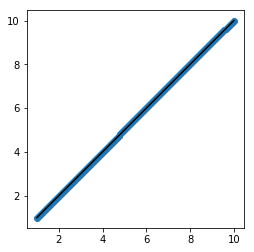

array([[6.95592287, 6.95592287],
       [6.95592287, 6.95592287]])

In [5]:
X = np.linspace(1, 10, 100)
Y = np.linspace(1, 10, 100)
plot_correlated_data(X, Y)
np.cov(X, Y)

We can see from the covariance matrix that the covariance is equal to the variance in x and in y.

Now let's add some noise to one of the variables so that they are no longer perfectly correlated. I will make $Y$ negative to create a negative correlation.

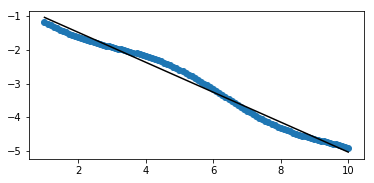

[[ 6.95592287 -3.08427   ]
 [-3.08427     1.38681544]]


In [6]:
X  ==  np.linspace(1, 10, 100)
Y = -(np.linspace(1, 5, 100) + np.sin(X)*.2)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

The data no longer forms a straight line. The covariance is $\sigma_{xy}=-3.08$. It is not close to zero compared to the magnitudes of $\sigma_x^2$ and $\sigma_y^2$, and so we know there is still a high degree of correlation. We can verify this by looking at the chart. The data forms nearly a straight line.

Now I will add random noise to a straight line.

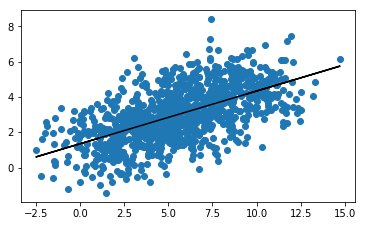

[[9.53803397 2.84898677]
 [2.84898677 2.44806441]]


In [7]:
from numpy.random import randn
X = np.linspace(1, 10, 1000) + randn(1000)*2
Y = np.linspace(1, 5, 1000) + randn(1000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

We see that the covariance is smaller in relation to the variances, reflecting the lower correlation between $X$ and $Y$. We can still fit a straight line through this data, but there is much greater variation in the data.

Finally, here is the covariance between completely random data.

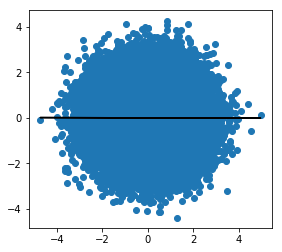

[[ 1.00000902 -0.00264381]
 [-0.00264381  1.00057763]]


In [8]:
X = randn(100000)
Y = randn(100000)
plot_correlated_data(X, Y)
print(np.cov(X, Y))

Here the covariances are very near zero. As you can see with the plot, there is no clear way to draw a line to fit the data. A vertical line would be as unconvincing as the horizontal line I've shown